# Idea:
Customers use Citibike to explore while Subscribers use it to commute to work, thus Customers will have a longer trip duration than Subscribers

# Null Hypothesis:

Our Hypothesis: Users that are subscribers take shorter distance rides compared to customers, who we assume are looking for a more leisurely and exploratory ride.

Null Hypothesis: On average the trip duration is the same or longer for a sample of users that are Subscribers compared to Customers throughout the months of January and August.

_$H_0$ : T(Customers) $\le$ T(Subscribers)

_$H_1$ : T(Customers) > T(Subscribers)

I will use significance level $\alpha$ = 0.05

In [2]:
%matplotlib inline
import pylab as pl
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

if os.getenv ('PUI2018') is None:
    print ("Must set env variable PUI2018")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2018")

import os
import json


Must set env variable PUI2018


In [3]:
jan_df = pd.read_csv('%s/JC-201801-citibike-tripdata.csv.zip'%os.getenv('PUIDATA'))
aug_df = pd.read_csv('%s/JC-201808-citibike-tripdata.csv.zip'%os.getenv('PUIDATA'))

In [4]:
jan_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,932,2018-01-01 02:06:17.5410,2018-01-01 02:21:50.0270,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31929,Subscriber,1992,1
1,550,2018-01-01 12:06:18.0390,2018-01-01 12:15:28.4430,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31845,Subscriber,1969,2
2,510,2018-01-01 12:06:56.9780,2018-01-01 12:15:27.8100,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31708,Subscriber,1946,1
3,354,2018-01-01 14:53:10.1860,2018-01-01 14:59:05.0960,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,31697,Subscriber,1994,1
4,250,2018-01-01 17:34:30.1920,2018-01-01 17:38:40.9840,3183,Exchange Place,40.716247,-74.033459,3639,Harborside,40.719252,-74.034234,31861,Subscriber,1991,1


In [5]:
jan_df.shape

(12677, 15)

In [6]:
aug_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,903,2018-08-01 06:40:33.3610,2018-08-01 06:55:37.1060,3183,Exchange Place,40.716247,-74.033459,3270,Jersey & 6th St,40.725289,-74.045572,29612,Subscriber,1977,1
1,78,2018-08-01 08:21:00.1450,2018-08-01 08:22:18.6310,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,29791,Subscriber,1975,1
2,405,2018-08-01 08:43:52.5150,2018-08-01 08:50:37.6140,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,29571,Subscriber,1973,1
3,155,2018-08-01 09:48:24.9450,2018-08-01 09:51:00.9360,3183,Exchange Place,40.716247,-74.033459,3275,Columbus Drive,40.718355,-74.038914,29504,Subscriber,1971,1
4,453,2018-08-01 12:15:35.1230,2018-08-01 12:23:08.8880,3183,Exchange Place,40.716247,-74.033459,3273,Manila & 1st,40.721651,-74.042884,33669,Subscriber,1993,1


In [7]:
aug_df.shape

(44432, 15)

In [8]:
df = pd.concat([jan_df, aug_df], axis=0)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,932,2018-01-01 02:06:17.5410,2018-01-01 02:21:50.0270,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31929,Subscriber,1992,1
1,550,2018-01-01 12:06:18.0390,2018-01-01 12:15:28.4430,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31845,Subscriber,1969,2
2,510,2018-01-01 12:06:56.9780,2018-01-01 12:15:27.8100,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31708,Subscriber,1946,1
3,354,2018-01-01 14:53:10.1860,2018-01-01 14:59:05.0960,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,31697,Subscriber,1994,1
4,250,2018-01-01 17:34:30.1920,2018-01-01 17:38:40.9840,3183,Exchange Place,40.716247,-74.033459,3639,Harborside,40.719252,-74.034234,31861,Subscriber,1991,1


In [9]:
df.shape

(57109, 15)

In [10]:
df_clean = df[['tripduration', 'usertype']]
df_clean.head()

,tripduration,usertype
0,932,Subscriber
1,550,Subscriber
2,510,Subscriber
3,354,Subscriber
4,250,Subscriber


In [11]:
usertype_groupby = df_clean.groupby('usertype').mean()

In [12]:
usertype_groupby['index'] = ('Customer', 'Subscriber')

Text(0.5,0.05,'Barplot of Average Trip Duration of Citibike Users that are Customers or Subscribers.\nCustomers travel three-times longer than Subscribers')

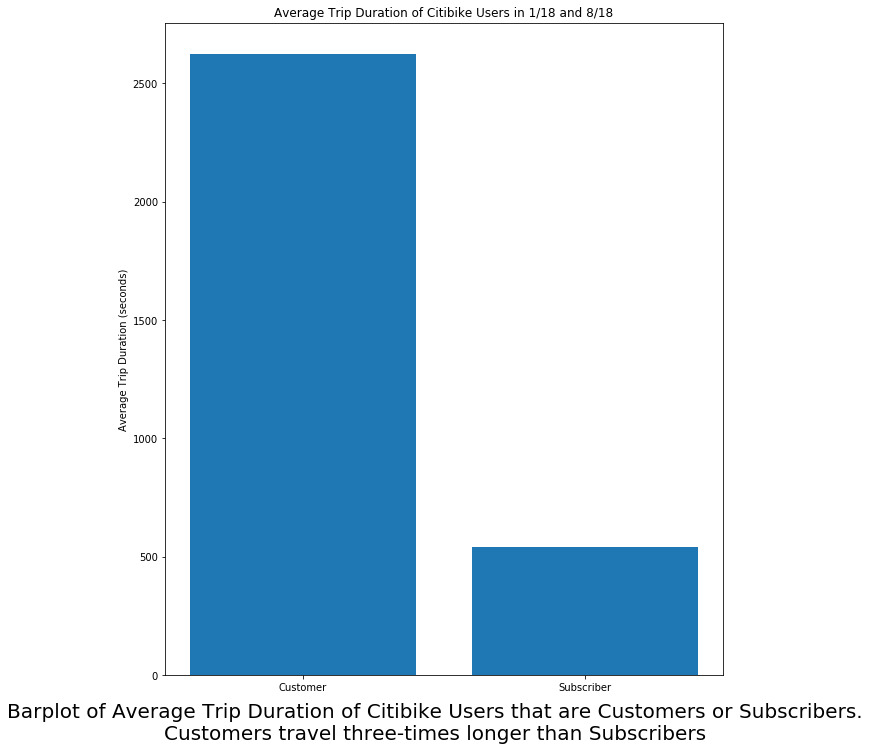

In [13]:
plt.figure(figsize=(10,12))
plt.bar(usertype_groupby['index'], usertype_groupby['tripduration'])
plt.title('Average Trip Duration of Citibike Users in 1/18 and 8/18')
plt.ylabel('Average Trip Duration (seconds)')
plt.figtext(0.5, 0.05, 'Barplot of Average Trip Duration of Citibike Users that are Customers or Subscribers.\nCustomers travel three-times longer than Subscribers', horizontalalignment='center', fontsize=20)

# Analysis:

In [14]:
df_clean.head()

,tripduration,usertype
0,932,Subscriber
1,550,Subscriber
2,510,Subscriber
3,354,Subscriber
4,250,Subscriber


In [15]:
sub = df_clean[df_clean['usertype'] == 'Subscriber']
sub.head()

,tripduration,usertype
0,932,Subscriber
1,550,Subscriber
2,510,Subscriber
3,354,Subscriber
4,250,Subscriber


In [16]:
cus = df_clean[df_clean['usertype'] == 'Customer']
cus.head()

,tripduration,usertype
40,5045,Customer
79,441,Customer
217,386,Customer
224,614,Customer
408,744,Customer


In [17]:
print('Subscriber length: ' + str(len(sub.iloc[:,0])))
print('Customer length: ' + str(len(cus.iloc[:,0])))

Subscriber length: 53766
Customer length: 3343


### Perform one-tailed t-test on two samples

In [18]:
from scipy.stats import ttest_ind

In [21]:
#Make dfs same number of rows
np.random.seed(42)
sub_sample = sub.sample(len(cus.iloc[:,0]))
sub_sample.shape

(3343, 2)

In [23]:
sub_sample.var()

tripduration    328694.099641
dtype: float64

In [24]:
cus.var()

tripduration    1.532824e+08
dtype: float64

In [28]:
ttest_ind(cus.tripduration, sub_sample.tripduration, equal_var=False)

Ttest_indResult(statistic=10.12305325886652, pvalue=9.5391998551775996e-24)